In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,10]

In [30]:
def plotPhase(m,title="",dots=20,trajectories=10,initValues="circle",xlim=[-3,3],ylim=[-3,3]):
    m = np.matrix(m)
    fig, ax = plt.subplots()
    
    if dots > 0:
        x1 = np.linspace(xlim[0],xlim[1], dots)
        x2 = np.linspace(ylim[0],ylim[1],dots)

        X1, X2 = np.meshgrid(x1, x2)

        t = 0

        u, v = np.zeros(X1.shape), np.zeros(X2.shape)

        NI, NJ = X1.shape

        for i in range(NI):
            for j in range(NJ):
                x = X1[i, j]
                y = X2[i, j]
                xprime = m.dot([x,y])
                norm = np.linalg.norm(xprime)
                u[i,j] = xprime[0,0] / norm
                v[i,j] = xprime[0,1] / norm


        Q = ax.quiver(X1, X2, u, v)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    def f(x,t=0):
         v = m.dot(x)
         return [v[0,0],v[0,1]]
    
    if initValues == "circle": 
        r = np.sqrt(2)*max(abs(x) for x in xlim+ylim) + 1
        initValues = [[r*np.sin(theta),r*np.cos(theta)] for theta in np.linspace(0,2*np.pi,trajectories)]
    tspan = np.linspace(0,5000,50000)
   
    for y0 in initValues:
        ys = odeint(f,y0,tspan)
        plt.plot(ys[:,0],ys[:,1],"b-")

### Produce phase plot with call to function `plotPhase(matrix,dots,trajectories,xlimits,ylimits)`
### 'matrix' is the only required argument. Set dots to zero to disable arrows, and set trajectories to zero to disable plotted solutions. 

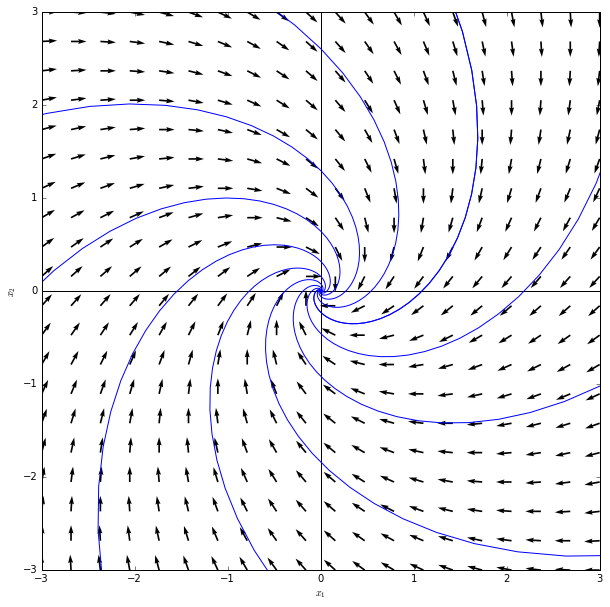

In [31]:
plotPhase([[-1/2,1],[-1,-1/2]])

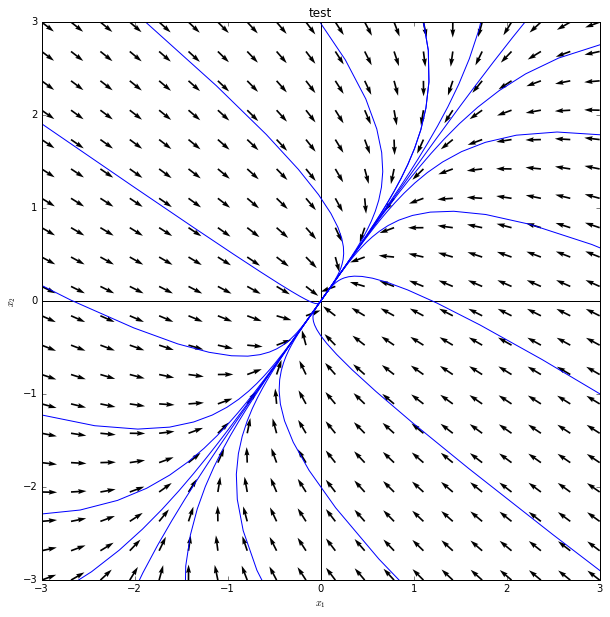

In [34]:
plotPhase([[-3,np.sqrt(2)],[np.sqrt(2),-2]],"",20,20)

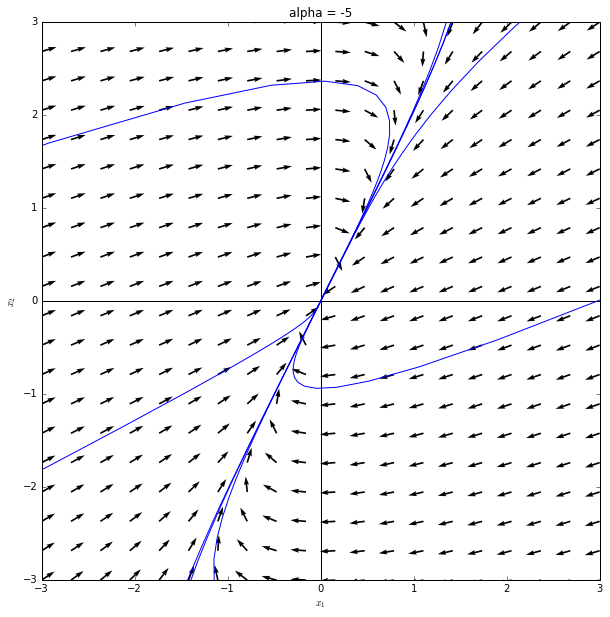

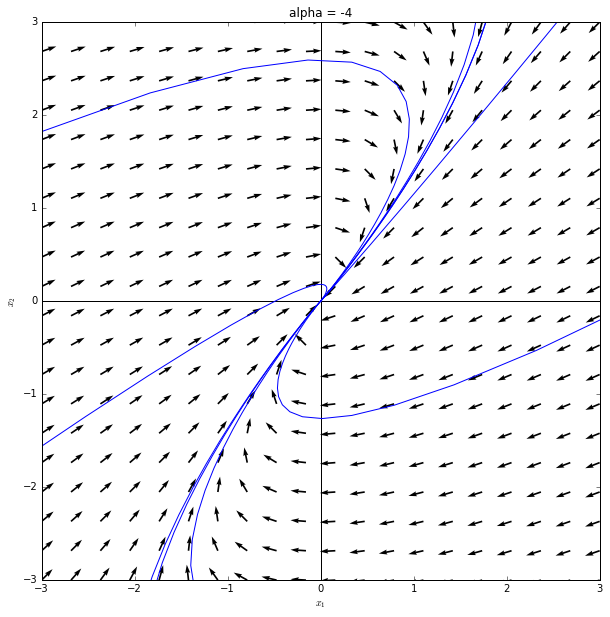

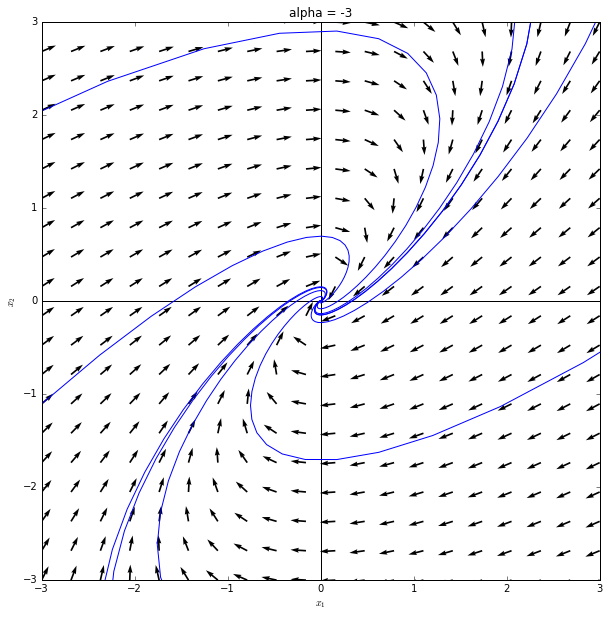

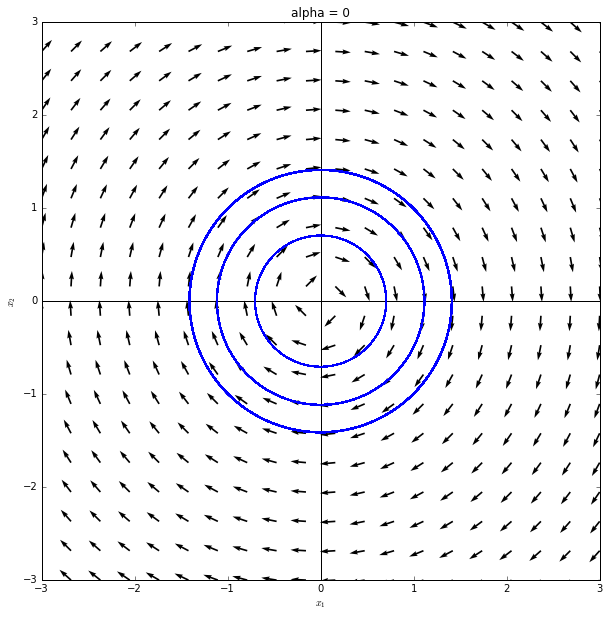

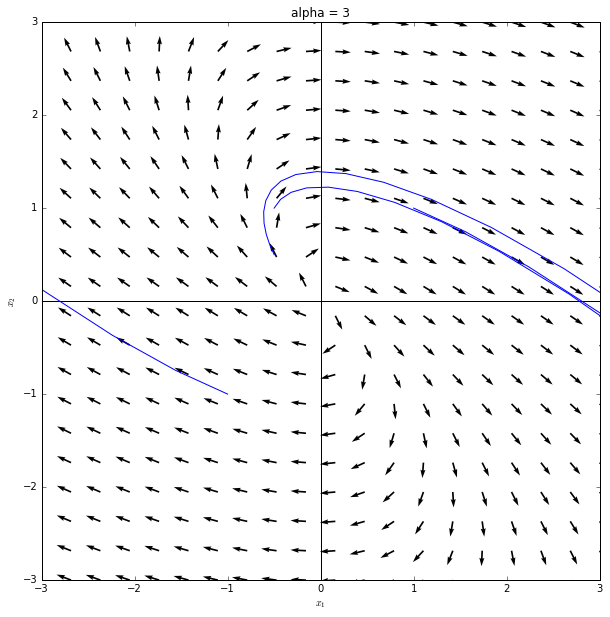

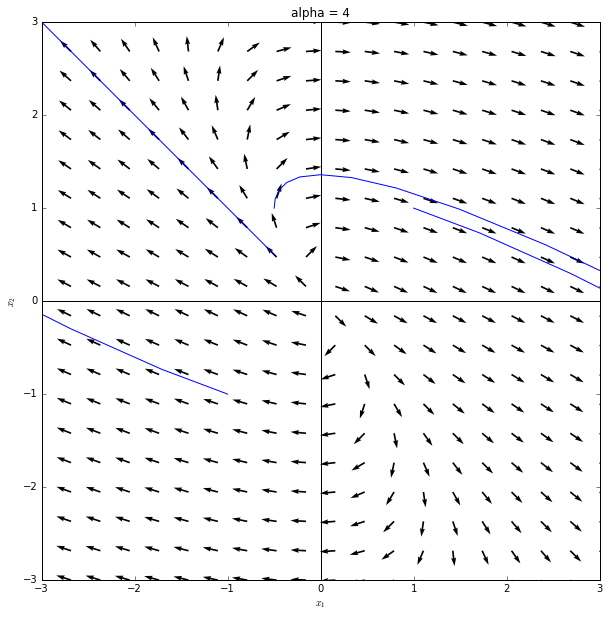

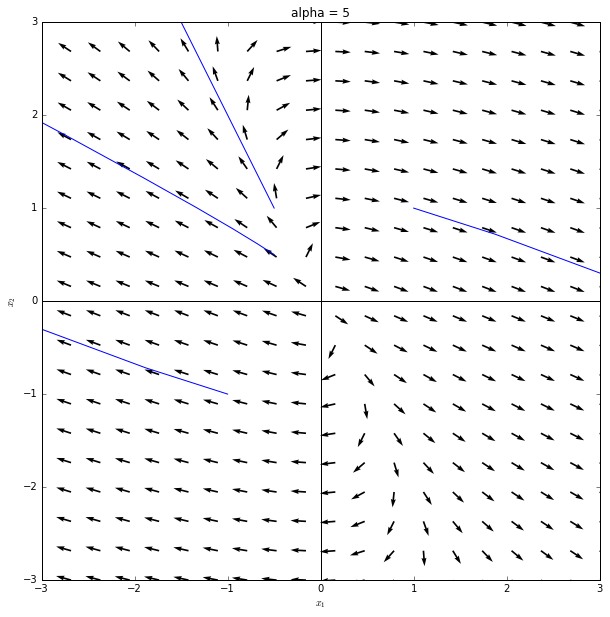

In [36]:
#alpha = [-5,-4,-3,0,3,4,5]
for a in [-5,-4,-3]:
    plotPhase([[a,2],[-2,0]],"alpha = " + str(a))
for a in [0,3,4,5]:
    plotPhase([[a,2],[-2,0]],"alpha = " + str(a),20,10,[[-0.5,0.5],[-0.5,1],[1,1],[-1,-1]])